In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("medical_examination.csv",header=[0],index_col=[0])
df.head(3)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1


### Overweight

In [3]:
bmi=df["weight"]/((df["height"]/100)*(df["height"])/100)
overweight = [1 if x>25 else 0 for x in bmi]
df["bmi"]=bmi
df['overweight'] = overweight
df.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
id,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,0
3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,0


### Cholesterol

In [4]:
gluc1=[1 if x>1 else 0 for x in df["gluc"]]
df["gluc"]=gluc1
df.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
id,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,0,0,0,1,0,21.967120,0
1,20228,1,156,85.0,140,90,3,0,0,0,1,1,34.927679,1
2,18857,1,165,64.0,130,70,3,0,0,0,0,1,23.507805,0
3,17623,2,169,82.0,150,100,1,0,0,0,1,1,28.710479,1
4,17474,1,156,56.0,100,60,1,0,0,0,0,0,23.011177,0


### gluc

In [5]:
cholesterol1=[1 if x>1 else 0 for x in df["cholesterol"]]
df["cholesterol"]=cholesterol1
df.head(5)

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
id,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0


### Cleaning

In [6]:
mask1 = (df['ap_lo'] <= df['ap_hi'])
mask2 = (df['height'] >= df['height'].quantile(0.025))
mask3 = (df['height'] <= df['height'].quantile(0.975))
mask4 = (df['weight'] >= df['weight'].quantile(0.025))
mask5 = (df['weight'] <= df['weight'].quantile(0.975))
mask = (mask1) & (mask2) & (mask3) & (mask4) & (mask5)
mask.sum()
df = df[mask]
df.head(5)
df

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi,overweight
id,,,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,0,0,0,0,1,0,21.967120,0
1,20228,1,156,85.0,140,90,1,0,0,0,1,1,34.927679,1
2,18857,1,165,64.0,130,70,1,0,0,0,0,1,23.507805,0
3,17623,2,169,82.0,150,100,0,0,0,0,1,1,28.710479,1
4,17474,1,156,56.0,100,60,0,0,0,0,0,0,23.011177,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99991,19699,1,172,70.0,130,90,0,0,0,0,1,1,23.661439,0
99992,21074,1,165,80.0,150,80,0,0,0,0,1,1,29.384757,1
99993,19240,2,168,76.0,120,80,0,0,1,0,1,0,26.927438,1


### Categorical Plot

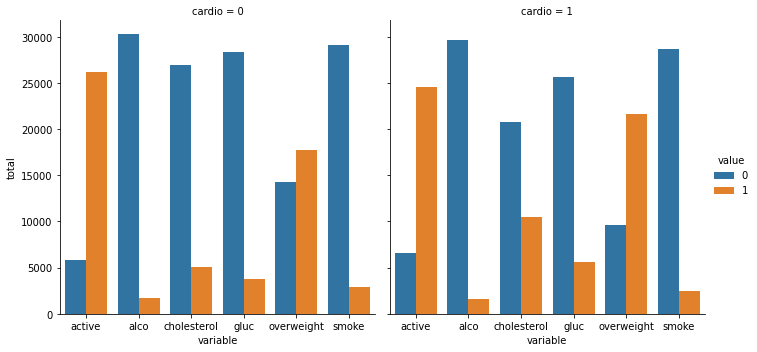

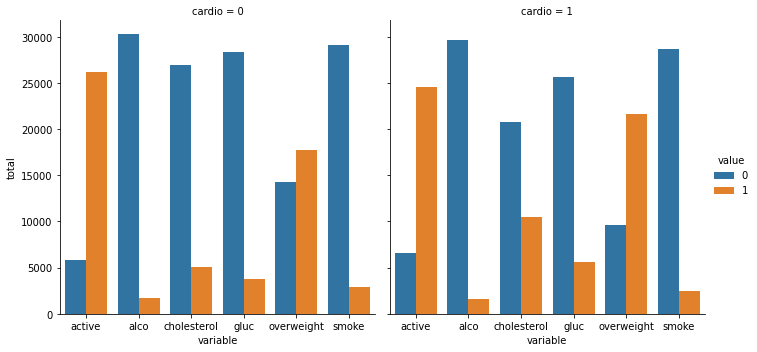

In [7]:
def draw_cat_plot():
    vars = sorted(
        ["cholesterol", "gluc", "smoke", "alco", "active", "overweight"]
    )

    df_cat = pd.melt(
        df,
        id_vars=["cardio"],
        value_vars=vars,
    )
    df_cat = df_cat.value_counts().reset_index(name="total")
    fig = sns.catplot(
        data=df_cat,
        x="variable",
        y="total",
        hue="value",
        col="cardio",
        kind="bar",
        order=vars,
    )
    fig.set_ylabels("total")
    fig.set_xlabels("variable")
    fig = fig.fig
    return fig
draw_cat_plot()

### Heat Map

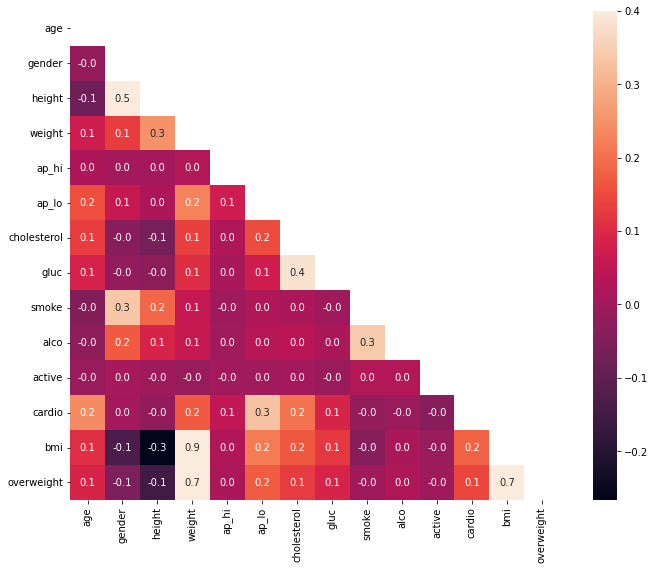

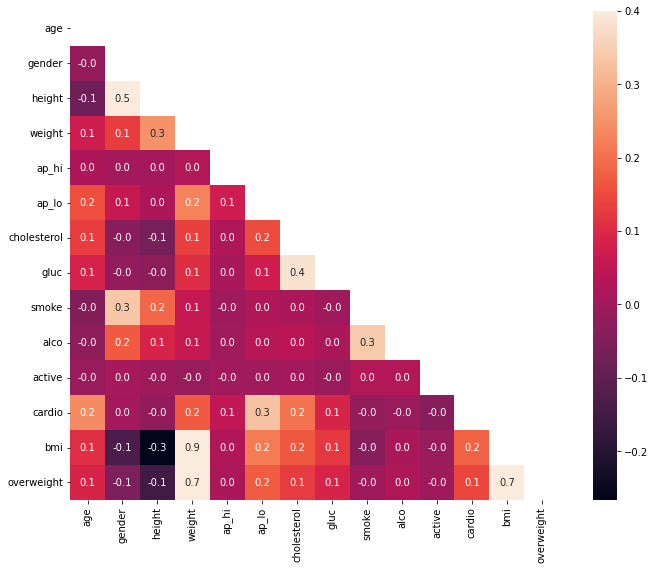

In [8]:
def draw_heat_map():
    corr = df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True
    fig, ax = plt.subplots(figsize=(12, 9))
    ax = sns.heatmap(
        corr,
        mask=mask,
        vmax=0.4,
        square=True,
        fmt=".1f",
        annot=True,
    )

    return fig
draw_heat_map()